In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


170498071/170498071 [==============================] - 2s 0us/step


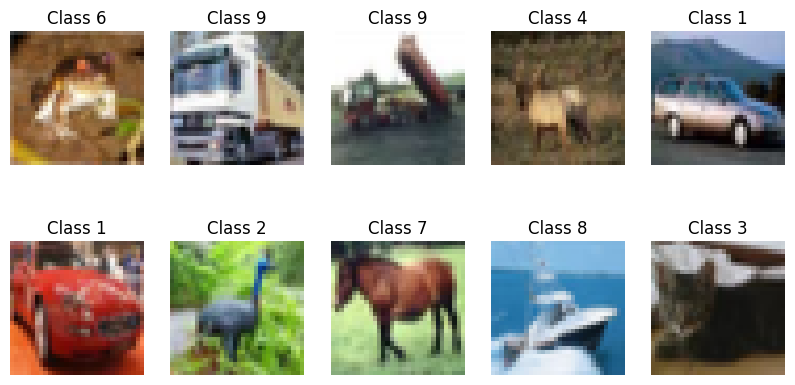

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i])
    plt.title(f"Class {np.argmax(train_labels[i])}")
    plt.axis('off')
plt.show()

In [ ]:
# LeNet model
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/10
391/391 [==============================] - 40s 98ms/step - loss: 1.7589 - accuracy: 0.3538 - val_loss: 1.5479 - val_accuracy: 0.4393
Epoch 2/10
391/391 [==============================] - 32s 82ms/step - loss: 1.4845 - accuracy: 0.4623 - val_loss: 1.4225 - val_accuracy: 0.4819
Epoch 3/10
391/391 [==============================] - 32s 82ms/step - loss: 1.3715 - accuracy: 0.5075 - val_loss: 1.3242 - val_accuracy: 0.5253
Epoch 4/10
391/391 [==============================] - 33s 86ms/step - loss: 1.2943 - accuracy: 0.5360 - val_loss: 1.2541 - val_accuracy: 0.5522
Epoch 5/10
391/391 [==============================] - 32s 81ms/step - loss: 1.2297 - accuracy: 0.5613 - val_loss: 1.2424 - val_accuracy: 0.5527
Epoch 6/10
391/391 [==============================] - 32s 82ms/step - loss: 1.1786 - accuracy: 0.5810 - val_loss: 1.1989 - val_accuracy: 0.5721
Epoch 7/10
391/391 [==============================] - 32s 81ms/step - loss: 1.1415 - accuracy: 0.5949 - val_loss: 1.2105 - val_accuracy:

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

313/313 - 3s - loss: 1.1071 - accuracy: 0.6076 - 3s/epoch - 8ms/step
Test accuracy: 60.76%


In [ ]:
# Predict labels for a few test images
num_images_to_display = 5
test_images = test_images[:10]
predicted_labels = model.predict(test_images)

1/1 [==============================] - 0s 159ms/step


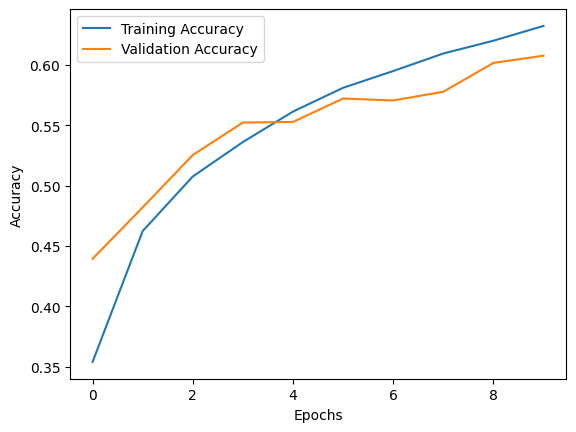

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

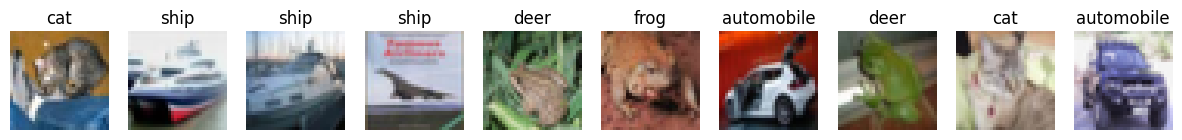

1/1 [==============================] - 0s 20ms/step


<ipython-input-12-dbf24ee98238>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i + 1)


1/1 [==============================] - 0s 19ms/step


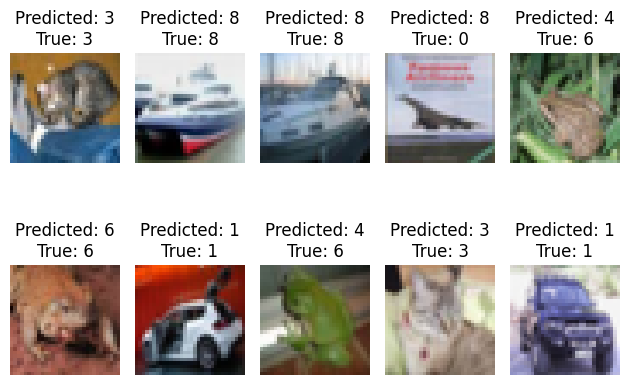

In [ ]:
# Display the test images along with their predicted labels
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(test_images[i])
    predicted_class_index = np.argmax(predicted_labels[i])
    plt.title(class_names[predicted_class_index])
    plt.axis('off')

plt.show()

plt.subplot(1, 2, 2)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    predicted_label = np.argmax(model.predict(np.expand_dims(test_images[i], axis=0)))
    true_label = np.argmax(test_labels[i])
    plt.title(f"Predicted: {predicted_label}\nTrue: {true_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()